In [1]:
import matplotlib.pyplot as plt
import pandas as pd;
import numpy as np;

In [2]:
import matplotlib.pyplot as plt

folder = "../logs/backups/../"
# folder = "../logs/backups/Thursday_10/"

def load_operation_logs(logName):
    filename = folder + logName + ".log"
    df = pd.read_csv(filename, index_col=None, \
                     names = ["time", "operation", "round", "turn", "message", "startTime", "durationMs", "numStates", "numStatesScanned", "action", "actor"],\
                     dtype = {"operation" : str}, \
                     parse_dates = ["time", "startTime"])
    df["operation"] = df["operation"].str.strip()
    return df

markov_operations = load_operation_logs("markovDecisionProcessTiming")
all_operations = markov_operations.append(load_operation_logs("operationTime"))

In [3]:
per_round_df = all_operations[["operation", "round", "durationMs"]].groupby(["operation", "round"]).sum()
# per_round_df = per_round_df.loc[["waitForActions", "calculateRewardForAction", "GameCanvas.run()", "GameCanvas.render()", "GameCanvas.tick()", "GameCanvas.setupNewRound()", "ActionScheduler.getDecisionsFromActors()", "ActionScheduler.calculateNextState()", "ActionScheduler.teachActors()"]]
per_round_df = per_round_df.loc[["ActionScheduler.promptActorsForDecisions()", "waitForActorDecisions", "waitForActorLearnings", "GameCanvas.run()", "GameCanvas.render()", "GameCanvas.tick()", "ActionScheduler.calculateNextState()", "ActionScheduler.teachActors()"]]
# per_round_df

<AxesSubplot:xlabel='round'>

<Figure size 432x288 with 0 Axes>

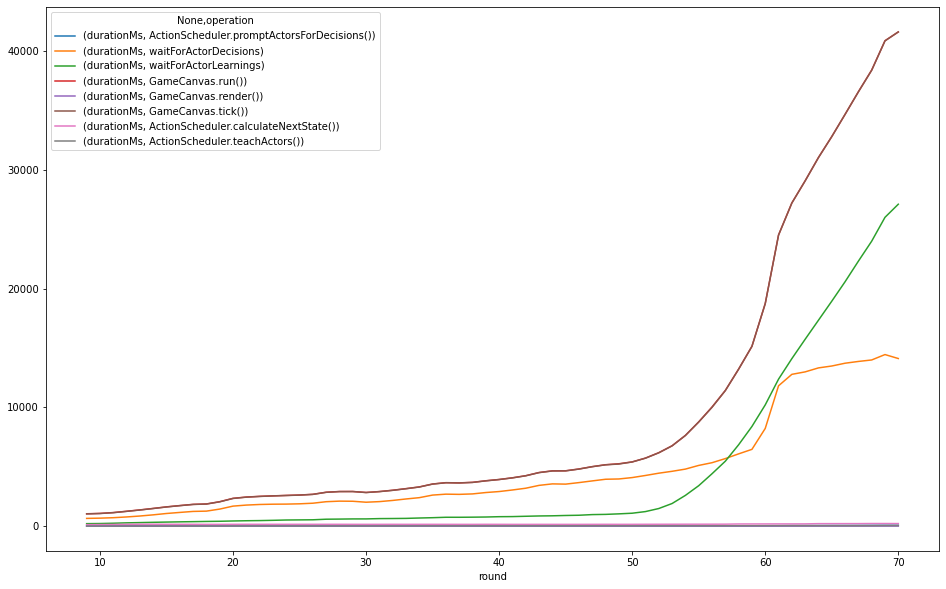

In [4]:
plt.figure()
per_round_df.unstack(level=0).rolling(window=10).mean().plot(figsize=(16,10))

In [5]:
per_round_df.groupby("operation").sum().sort_values("durationMs", ascending=False)

,durationMs
operation,
GameCanvas.run(),760212
GameCanvas.tick(),759665
waitForActorLearnings,404634
waitForActorDecisions,337437
ActionScheduler.calculateNextState(),11184
ActionScheduler.teachActors(),1556
ActionScheduler.promptActorsForDecisions(),1536
GameCanvas.render(),13


In [6]:

time_diffs = all_operations[["operation", "round", "turn", "durationMs", "startTime"]]\
    .groupby(["round"]).agg({"startTime" : ["min", "max"], "turn":["max"]})
time_diffs["totalTime"] = (time_diffs["startTime"]["max"] - time_diffs["startTime"]["min"]).dt.microseconds/1.0e6
time_diffs["framesPerSecond"] = time_diffs["turn"]["max"]/time_diffs["totalTime"]
time_diffs = time_diffs[["totalTime", "framesPerSecond"]]

<AxesSubplot:xlabel='round'>

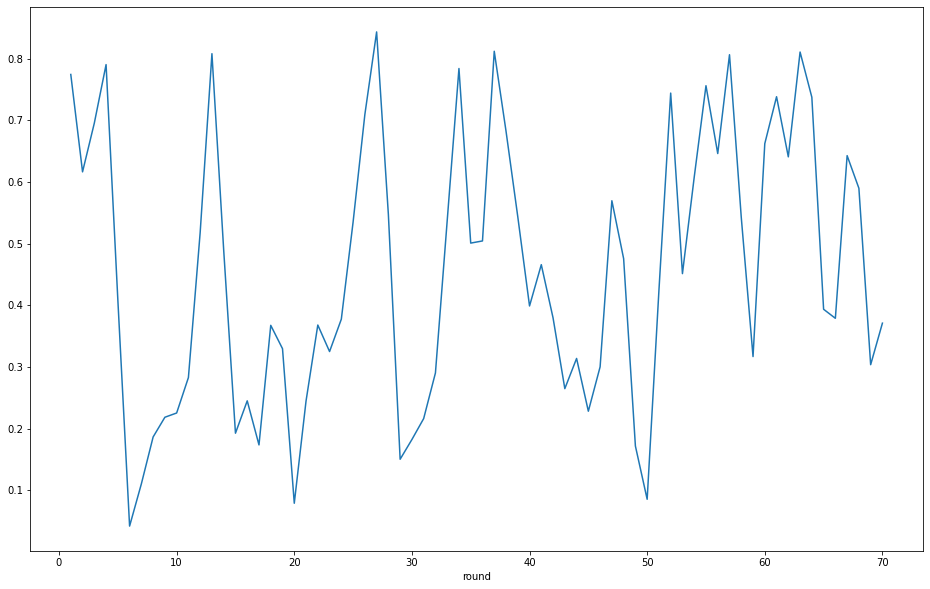

In [7]:
time_diffs["totalTime"].rolling(window=2).mean().plot(kind='line', figsize=(16, 10))

In [8]:
def load_rewards():
    logName = "actorDecisions"
    filename = folder + logName + ".log"
    df = pd.read_csv(filename, index_col=None, \
                     dtype = {"operation" : str}, \
                     parse_dates = ["time"], \
                     names = ["time", "operation", "round", "turn", "message", "startTime", "durationMs", "actor", "action", "reward"],\
                     )
#     df["operation"] = df["operation"].str.strip()
    return df

rewards_df = load_rewards()


<AxesSubplot:xlabel='round'>

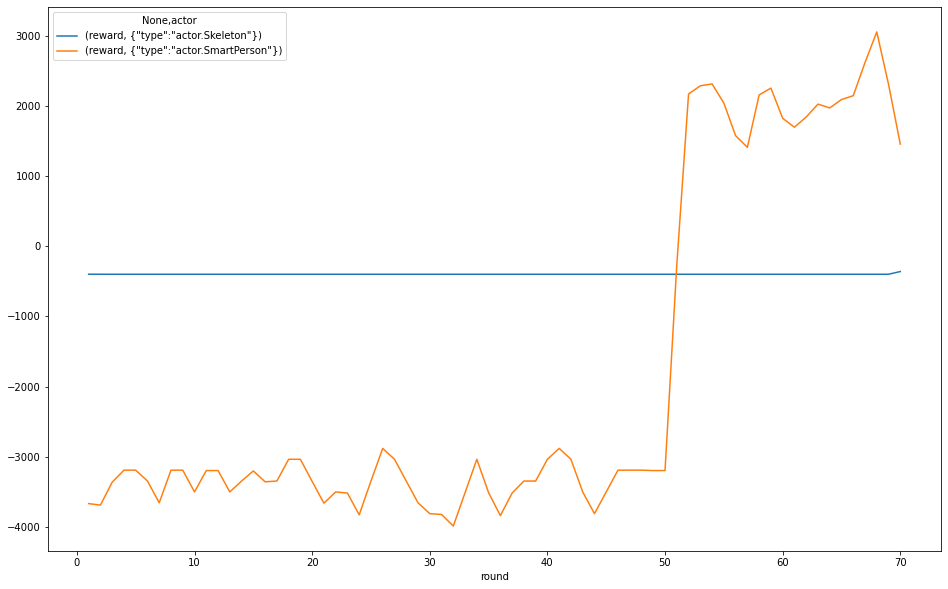

In [9]:
rewards_df[["round", "reward", "actor", "action"]].groupby(["actor", "round"]).sum().unstack(level=0).rolling(window=2).mean().plot(figsize=(16,10))